## FETCHING DATA

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_option_data=pd.read_csv('/content/hal_ki_chain.csv')

In [71]:

df_option_data.head()
requirred_data=df_option_data.iloc[:,[4,10]]
requirred_data



,LTP,STRIKE
0,740,4000.0
1,-,4100.0
2,553.9,4200.0
3,519.35,4300.0
4,412,4400.0
5,314,4500.0
6,254.35,4600.0
7,200.65,4700.0
8,155.7,4800.0
9,120.8,4900.0


In [72]:
new_data_frame=requirred_data.drop(index=[1]).reset_index(drop=True)
new_data_frame['LTP']=new_data_frame['LTP'].astype(float)
new_data_frame['STRIKE']=new_data_frame['STRIKE'].astype(str).str.replace(',','').astype(float)

new_data_frame
my_strike_list=new_data_frame.iloc[:,1]
my_strike_list

,STRIKE
0,4000.0
1,4200.0
2,4300.0
3,4400.0
4,4500.0
5,4600.0
6,4700.0
7,4800.0
8,4900.0
9,5000.0


## CALCULATING ALL POSSIBLE SPREAD AND MAX_LOSS

In [73]:


my_outer_list=[]
for i in range(len(new_data_frame)):
  my_list=[]
  for j in range(len(new_data_frame)):
    my_list.append(new_data_frame.iloc[i,0]-new_data_frame.iloc[j,0])

  my_outer_list.append(my_list)

df_max_loss=pd.DataFrame(my_outer_list)

my_outer_list_spread=[]
for i in range(len(new_data_frame)):
  my_list=[]
  for j in range(len(new_data_frame)):
    my_list.append(new_data_frame.iloc[i,1]-new_data_frame.iloc[j,1])

  my_outer_list_spread.append(my_list)

df_spread=pd.DataFrame(my_outer_list_spread)

print(df_spread,df_max_loss)

        0       1       2       3       4       5       6       7       8   \
0      0.0  -200.0  -300.0  -400.0  -500.0  -600.0  -700.0  -800.0  -900.0   
1    200.0     0.0  -100.0  -200.0  -300.0  -400.0  -500.0  -600.0  -700.0   
2    300.0   100.0     0.0  -100.0  -200.0  -300.0  -400.0  -500.0  -600.0   
3    400.0   200.0   100.0     0.0  -100.0  -200.0  -300.0  -400.0  -500.0   
4    500.0   300.0   200.0   100.0     0.0  -100.0  -200.0  -300.0  -400.0   
5    600.0   400.0   300.0   200.0   100.0     0.0  -100.0  -200.0  -300.0   
6    700.0   500.0   400.0   300.0   200.0   100.0     0.0  -100.0  -200.0   
7    800.0   600.0   500.0   400.0   300.0   200.0   100.0     0.0  -100.0   
8    900.0   700.0   600.0   500.0   400.0   300.0   200.0   100.0     0.0   
9   1000.0   800.0   700.0   600.0   500.0   400.0   300.0   200.0   100.0   
10  1100.0   900.0   800.0   700.0   600.0   500.0   400.0   300.0   200.0   
11  1200.0  1000.0   900.0   800.0   700.0   600.0   500.0   400

## CALCULATING REAWRD TO RISK

In [74]:

df_risk_reward=(-df_spread-df_max_loss)/df_max_loss
# print(df_risk_reward)
df_risk_reward=df_risk_reward.unstack().sort_values(ascending=False).dropna().drop_duplicates()
my_loss_listt=[]
my_max_profit_list=[]
for i in range(len(df_risk_reward)):
  my_loss_listt.append(df_max_loss.iloc[df_risk_reward.index[i][1],df_risk_reward.index[i][0]])
  my_max_profit_list.append(-df_spread.iloc[df_risk_reward.index[i][1],df_risk_reward.index[i][0]]-df_max_loss.iloc[df_risk_reward.index[i][1],df_risk_reward.index[i][0]])

df_risk_reward=pd.DataFrame(df_risk_reward)
df_risk_reward['loss']=my_loss_listt
df_risk_reward['profit']=my_max_profit_list

df_risk_reward=df_risk_reward[df_risk_reward['loss']>0 ]
df_risk_reward=df_risk_reward[df_risk_reward[0]>0 ]

In [75]:
strike_1=[]
strike_2=[]
for i in range(len(df_risk_reward)):
  strike_1.append(my_strike_list[df_risk_reward.index[i][0]])
  strike_2.append(my_strike_list[df_risk_reward.index[i][1]])
df_risk_reward['strike_1']=strike_1
df_risk_reward['strike_2']=strike_2
df_risk_reward.columns=['reward','loss','profit','strike_1','strike_2']
df_risk_reward.reset_index(drop=True)
df_risk_reward.index
my_strike_list

,STRIKE
0,4000.0
1,4200.0
2,4300.0
3,4400.0
4,4500.0
5,4600.0
6,4700.0
7,4800.0
8,4900.0
9,5000.0


In [76]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df_risk_reward)

https://docs.google.com/spreadsheets/d/1XigumAiIU5t6XR9jmQmwULh85LsAwdtd-MgG3PDfSJ8#gid=0


## CALCULATING VOLATILTY AND PREDICTING PRICE RANGE OVER A TIME PERIOD

In [159]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=yf.download(tickers='HAL.NS',period='max',interval='1d')
req_data=data['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [160]:
req_data

,Adj Close
Date,
2018-04-02,480.766541
2018-04-03,472.127930
2018-04-04,466.815308
2018-04-05,465.999420
2018-04-06,461.356018
2018-04-09,462.025269
2018-04-10,461.125977
2018-04-11,459.034332
2018-04-12,454.369873


In [161]:
req_data=pd.DataFrame(req_data)
req_data.reset_index(inplace=True)


per_change=[None]


for i in range(1,len(req_data)):
  change=((req_data.iloc[i,1]-req_data.iloc[i-1,1])/req_data.iloc[i-1,1])*100
  per_change.append(change)


req_data['%change']=per_change

req_data=req_data.drop(index=0)





In [164]:
req_data
mean=req_data['%change'].mean()
std=req_data['%change'].std()
print(mean,std)

0.17289188246349377 2.3407874284094516


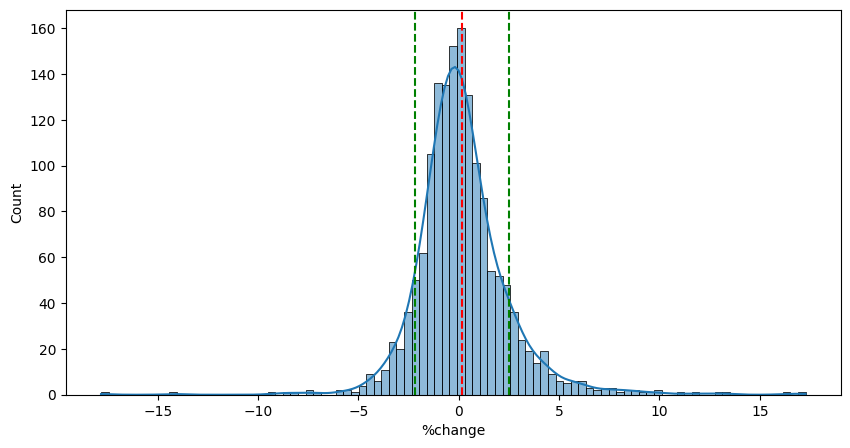

10.641211504064406 -10.295427739137418


In [169]:
import math
plt.figure(figsize=(10,5))
sns.histplot(req_data['%change'],kde=True)
plt.axvline(mean,color='r',linestyle='--')
plt.axvline(mean+std,color='g',linestyle='--')
plt.axvline(mean-std,color='g',linestyle='--')
plt.show()



In [171]:
pos_change_in_next_ndays=mean+std*math.sqrt(20)
neg_change_in_next_ndays=mean-std*math.sqrt(20)
print(pos_change_in_next_ndays,neg_change_in_next_ndays)
print('\n')
current_price=4700
print(current_price*(1+pos_change_in_next_ndays/100))
print(current_price*(1+neg_change_in_next_ndays/100))



10.641211504064406 -10.295427739137418


5200.136940691027
4216.114896260541


In [173]:
#range expected after results
estimated_current_price_at_result_date=4500
pos_change_in_next_ndays=mean+std*math.sqrt(14)
neg_change_in_next_ndays=mean-std*math.sqrt(14)

upper_target=estimated_current_price_at_result_date*(1+pos_change_in_next_ndays/100)
lower_target=estimated_current_price_at_result_date*(1+neg_change_in_next_ndays/100)
print(upper_target,lower_target)

4901.909240467768 4113.651028953946


## FUNDAMENTAL_ANALYSIS

In [224]:
df_quat_combined=pd.read_excel('/content/COMBINED.xlsx')
df_quat_combined=df_quat_combined.iloc[[0,3,5,6,7,9,10,17,18,19,20,21,23,24,25]].reset_index(drop=True)
df_quat_combined
# df_quat_moodified=df_quat_combined.drop(index=[2,4,8,11,12,13,26,27]).reset_index(drop=True)
# df_quat_moodified

,Column1,Column2,Column3,Column4,Column5,Column6,Column2.1,Column3.1,Column4.1,Column5.1,...,Column6.2,Column2.3,Column3.3,Column4.3,Column5.3,Column6.3,Column2.4,Column3.4,Column4.4,Column5.4
0,NaN,Mar '24,Dec '23,Sep '23,Jun '23,Mar '23,Dec '22,Sep '22,Jun '22,Mar '22,...,Sep '20,Jun '20,Mar '20,Dec '19,Sep '19,Jun '19,Mar '19,Dec '18,Sep '18,Jun '18
1,Total Income From Operations,"14,768.75","6,061.28","5,635.70","3,915.35","12,494.67","5,665.54","5,144.79","3,622.46","11,561.13",...,"4,853.60","1,736.74","10,323.00","4,456.35","3,451.07","3,291.44","10,044.44","4,425.29","2,610.33","2,813.82"
2,Consumption of Raw Materials,"6,488.83","2,806.02","1,967.20","1,084.28","4,963.91","2,051.05","1,733.84","1,244.88","3,576.98",...,"2,041.59","1,084.43","2,566.72","2,805.64","1,544.20","1,247.97","2,621.02","1,862.50","1,859.46","1,012.45"
3,Purchase of Traded Goods,286.68,139.71,157.01,88.00,466.31,183.54,81.19,68.11,284.14,...,77.71,51.51,286.57,92.08,120.08,88.42,122.76,79.08,81.93,23.72
4,Increase/Decrease in Stocks,"-1,927.33",-110.86,227.68,-148.13,-674.09,255.15,25.95,-297.73,776.15,...,304.86,"-1,327.55","2,410.51","-1,012.55",-328.13,-358.41,"2,445.44",118.38,"-1,273.74",-122.54
5,Employees Cost,"1,390.62","1,300.47","1,195.91","1,403.69","1,615.04","1,132.80","1,144.69","1,017.84","1,402.67",...,"1,030.20","1,149.61","1,456.35","1,276.25","1,013.24","1,032.11","1,276.36","1,071.71",905.53,"1,057.43"
6,Depreciation,643.97,212.17,349.65,201.38,"1,055.61",268.88,251.97,208.21,382.50,...,219.79,111.28,510.80,202.66,166.61,118.44,504.18,234.96,139.00,151.14
7,"P/L Before Other Inc., Int., Excpt. Items &\nTax","5,257.29","1,223.16","1,177.99",675.45,"2,190.18",716.56,"1,369.66",618.08,"2,117.33",...,809.78,273.09,"1,992.23",670.87,535.32,731.41,"1,984.11",651.79,380.24,386.57
8,Other Income,557.31,459.98,469.37,409.94,722.23,497.18,259.07,191.64,500.66,...,87.97,47.25,159.96,33.18,41.03,59.73,119.40,57.39,70.03,129.29
9,"P/L Before Int., Excpt. Items & Tax","5,814.60","1,683.14","1,647.36","1,085.39","2,912.41","1,213.74","1,628.73",809.72,"2,617.99",...,897.75,320.34,"2,152.19",704.05,576.35,791.14,"2,103.51",709.18,450.27,515.86


In [199]:
past_quat_results=pd.read_excel('/content/QUATERLY_COMP.xlsx')
past_quat_results=past_quat_results.drop(index=[0,1])
past_quat_results
past_quat_results.columns=['TITLE','DEC0','MARCH1','JUNE1','SEP1','DEC1','MARCH2','JUNE2','SEP2','DEC2','MARCH3']
past_quat_results.reset_index(drop=True,inplace=True)
past_quat_results

,TITLE,DEC0,MARCH1,JUNE1,SEP1,DEC1,MARCH2,JUNE2,SEP2,DEC2,MARCH3
0,Sales,5893.69,11558.14,3622.52,5144.89,5665.86,12494.58,3915.34,5635.81,6060.91,14768.78
1,Expenses,4463.04,9063.28,2797.55,3534.88,4680.32,9252.14,3035.75,4106.99,4626.82,8872.35
2,Operating Profit,1430.65,2494.86,824.97,1610.01,985.54,3242.44,879.59,1528.82,1434.09,5896.43
3,Other Income,194.78,503.41,192.09,260.8,496.95,721.96,410.79,470.98,459.69,557.08
4,Depreciation,373.32,382.33,208.05,251.82,268.69,1055.35,201.24,349.45,212,643.76
5,Interest,0.75,42.09,0.22,0.35,2.06,55.28,0.01,0.3,0.35,31.39
6,Profit before tax,1251.36,2573.85,808.79,1618.64,1211.74,2853.77,1089.13,1650.05,1681.43,5778.36
7,Tax,313.81,-528.11,202.13,409.42,57.75,12.47,274.94,414.75,427.92,1486.32
8,Net profit,937.55,3101.96,606.66,1209.22,1153.99,2841.3,814.19,1235.3,1253.51,4292.04
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
df_june_data=past_quat_results.iloc[:,[0,3,7]]
df_june_data['growth']=(((df_june_data['JUNE2']-df_june_data['JUNE1'])/df_june_data['JUNE1']))
df_june_data['JUNE3']=(df_june_data['growth']+1)*df_june_data['JUNE2']
df_june_data

<ipython-input-204-074aa7f37e7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_june_data['growth']=(((df_june_data['JUNE2']-df_june_data['JUNE1'])/df_june_data['JUNE1']))
<ipython-input-204-074aa7f37e7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_june_data['JUNE3']=(df_june_data['growth']+1)*df_june_data['JUNE2']


,TITLE,JUNE1,JUNE2,growth,JUNE3
0,Sales,3622.52,3915.34,0.080833,4231.829587
1,Expenses,2797.55,3035.75,0.085146,3294.231761
2,Operating Profit,824.97,879.59,0.066208,937.826307
3,Other Income,192.09,410.79,1.138529,878.486252
4,Depreciation,208.05,201.24,-0.032733,194.652908
5,Interest,0.22,0.01,-0.954545,0.000455
6,Profit before tax,808.79,1089.13,0.346617,1466.640484
7,Tax,202.13,274.94,0.360214,373.977161
8,Net profit,606.66,814.19,0.342086,1092.713144
9,NaN,NaN,NaN,NaN,NaN
